# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import keras as kr
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np



In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
dataset = pd.read_csv(url, names=names)
dataset



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [15]:
# Faltantes
marcadores = dataset[dataset == '?'].count()
marcadores

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [16]:
# CCA
dataset = dataset[dataset['ca'] != '?']
dataset = dataset[dataset['thal'] != '?']


In [17]:
tipos_de_datos = dataset.dtypes
tipos_de_datos

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
num           int64
dtype: object

In [18]:
#Tipo correcto
dataset['ca'] = dataset['ca'].astype(float)
dataset['thal'] = dataset['thal'].astype(float)

In [20]:
# Características numéricas
scaler = StandardScaler()
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[features] = scaler.fit_transform(dataset[features])

# Dividicion de columnas del dataset en variables independientes (X) y dependientes (Y)
X = dataset.iloc[:, 0:13].values  
Y = dataset.iloc[:, 13].values    

# Codificar los valores de 'num' en enteros
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# Convertir los enteros en variables dummy (one hot encoding)
dummy_y = kr.utils.to_categorical(encoded_Y)


In [19]:

# Dividicion del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.20, random_state=1)


## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

In [21]:

model = Sequential()
model.add(Dense(units=32, input_dim=13, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Comienza con una capa de entrada que tiene 13 neuronas, correspondientes a las 13 características del dataset. Luego, tiene dos capas ocultas: la primera con 32 neuronas y la segunda con 16 neuronas, ambas con función de activación ReLU. Finalmente, la red tiene una capa de salida con 5 neuronas, correspondientes a las 5 categorías de la variable objetivo, y utiliza la función de activación softmax para producir probabilidades para cada categoría.

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [24]:
historial_por_capas = {} 
for num_capas in range(1, 11):
    
    model = Sequential()
    
    model.add(Dense(32, input_dim=13, activation='relu'))
    
    for _ in range(num_capas - 1):  
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(5, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
    
    historial_por_capas[num_capas] = history  

### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [25]:
neuronas_range = np.logspace(np.log10(10), np.log10(1000), num=10).astype(int)

historial_por_neuronas = {}  
for neuronas in neuronas_range:
    
    model = Sequential()
    model.add(Dense(neuronas, input_dim=13, activation='relu'))
    model.add(Dense(5, activation='softmax')) 
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)
    
    historial_por_neuronas[neuronas] = history  


### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [ ]:

epocas_range = np.logspace(np.log10(10), np.log10(5000), num=10).astype(int)

historial_por_epocas = {}  
for epocas in epocas_range:
    
    model = Sequential()
    model.add(Dense(100, input_dim=13, activation='relu'))  
    model.add(Dense(5, activation='softmax'))  

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=epocas, batch_size=10, verbose=0)
    
    historial_por_epocas[epocas] = history  


## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [ ]:
batch_range = np.logspace(np.log10(1), np.log10(len(X_train)), num=10).astype(int)

historial_por_batch = {} 
for batch_size in batch_range:
    
    model = Sequential()
    model.add(Dense(100, input_dim=13, activation='relu'))  
    model.add(Dense(5, activation='softmax'))  
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=0)
    
    historial_por_batch[batch_size] = history 


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

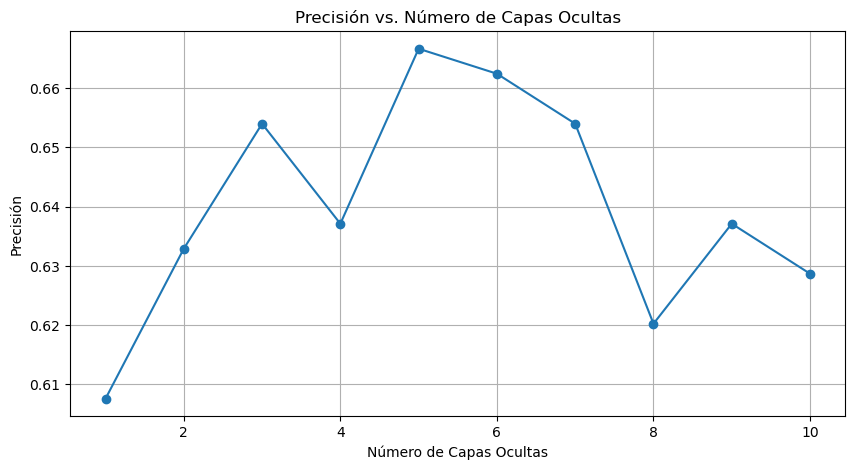

In [28]:
import matplotlib.pyplot as plt

num_capas = list(range(1, 11))
precisions = [historiales_por_capas[i].history['accuracy'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, precisions, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()

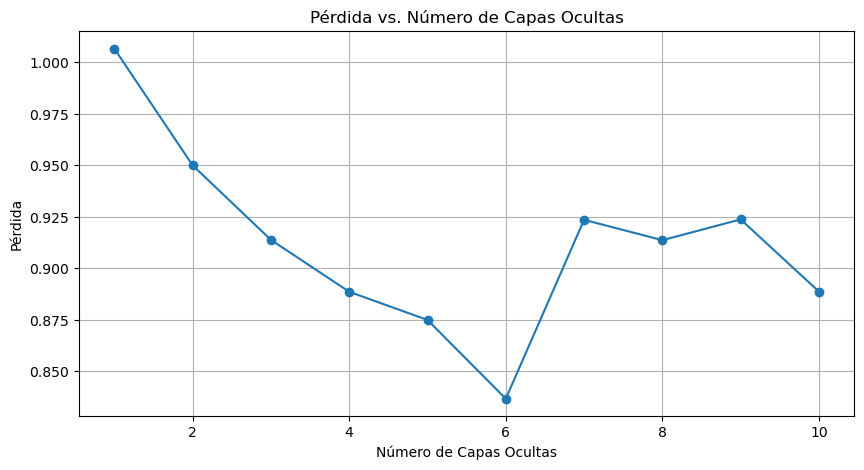

In [62]:

losses = [historiales_por_capas[i].history['loss'][-1] for i in num_capas]

plt.figure(figsize=(10, 5))
plt.plot(num_capas, losses, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Capas Ocultas')
plt.xlabel('Número de Capas Ocultas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()


In [24]:
### Tu conclusión aquí
### A medida que aumentamos las capas de 1 a 6, observamos mejoras en la precisión y reducciones en la pérdida. Sin embargo, a partir de las 6 capas, el rendimiento general tiende a estabilizarse o incluso a deteriorarse. Esto nos lleva a la conclusión de que, en el contexto de este conjunto de datos y configuración, un modelo con aproximadamente 6 capas ocultas parece ser la elección óptima para lograr un equilibrio entre el poder de representación y la generalización del modelo.

### Como definiste la cantidad de neuronas para tus capas ocultas?
### Se utilizo 32 neuronas para las capas ocultas. Es importante tener en cuenta que el número de neuronas en las capas ocultas es un hiperparámetro ajustable. La elección óptima de este valor puede variar según el tamaño y la naturaleza del conjunto de datos, así como la complejidad del problema en cuestión. En última instancia, encontrar el equilibrio correcto entre la capacidad de representación del modelo y su capacidad de generalización es fundamental para diseñar redes neuronales efectivas en un contexto específico.

### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

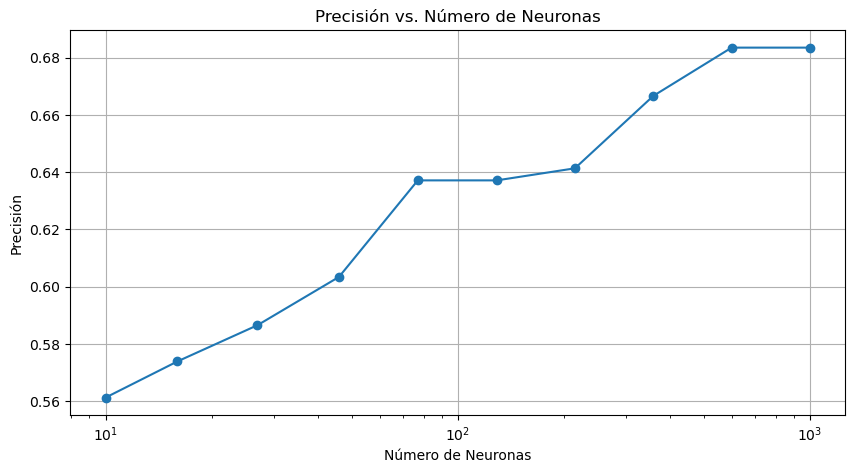

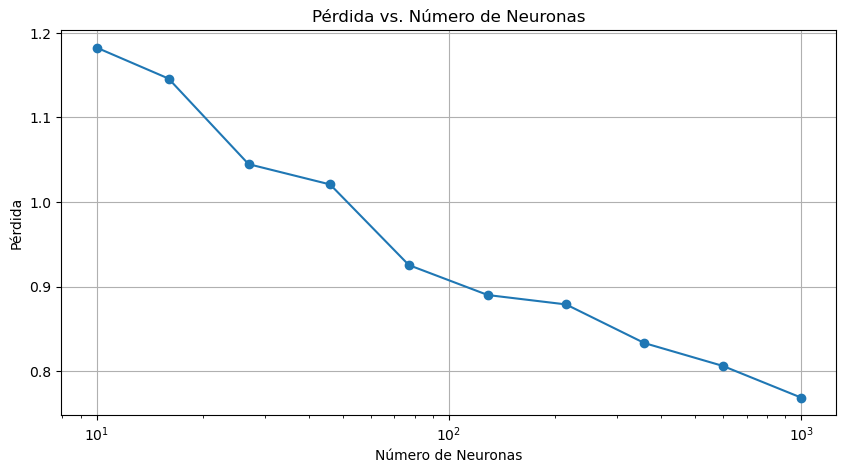

In [64]:
neuronas_list = list(neuronas_range)

precisions_neuronas = [historiales_por_neuronas[neuronas].history['accuracy'][-1] for neuronas in neuronas_list]
losses_neuronas = [historiales_por_neuronas[neuronas].history['loss'][-1] for neuronas in neuronas_list]

plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, precisions_neuronas, marker='o', linestyle='-')
plt.title('Precisión vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Precisión')
plt.grid(True)
plt.xscale('log')  
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(neuronas_list, losses_neuronas, marker='o', linestyle='-')
plt.title('Pérdida vs. Número de Neuronas')
plt.xlabel('Número de Neuronas')
plt.ylabel('Pérdida')
plt.grid(True)
plt.xscale('log')  
plt.show()


In [26]:
### Tu conclusión aquí
### En medida que aumenta el número de neuronas, la precisión mejora, 
### mientras que la pérdida tiende a disminuir. Después de cierto punto 
### (359 neuronas), los incrementos en precisión son marginales y la pérdida se 
### estabiliza. La recomendacion es agregar más neuronas después de este(359 neuronas)

### Cosideras necesario cambiar la cantidad de neuronas para el ejercicio sobre variabilidad en capas ocultas?
### El número de capas y neuronas por capa puede variar según el problema 
### y el conjunto de datos puede funcionar mejor.

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

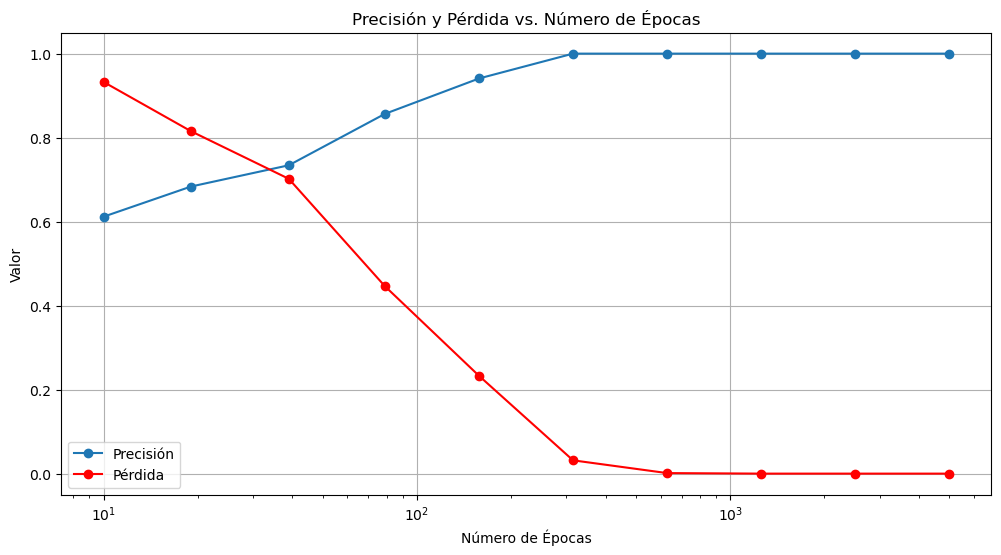

In [66]:

epocas_list = list(epocas_range)

precisions = [hist.history['accuracy'][-1] for hist in historiales_por_epocas.values()]  
losses = [hist.history['loss'][-1] for hist in historiales_por_epocas.values()]  

plt.figure(figsize=(12, 6))


plt.plot(epocas_list, precisions, marker='o', linestyle='-', label='Precisión')

plt.plot(epocas_list, losses, marker='o', linestyle='-', label='Pérdida', color='red')

plt.title('Precisión y Pérdida vs. Número de Épocas')
plt.xlabel('Número de Épocas')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.xscale('log')  
plt.show()


In [28]:
### Tu conclusión aquí
### El modelo mejora su rendimiento a medida que se aumentan las épocas, pero alcanza un punto de rendimiento casi perfecto después de un cierto número de épocas
## el punto esta cerca de 10^2

### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

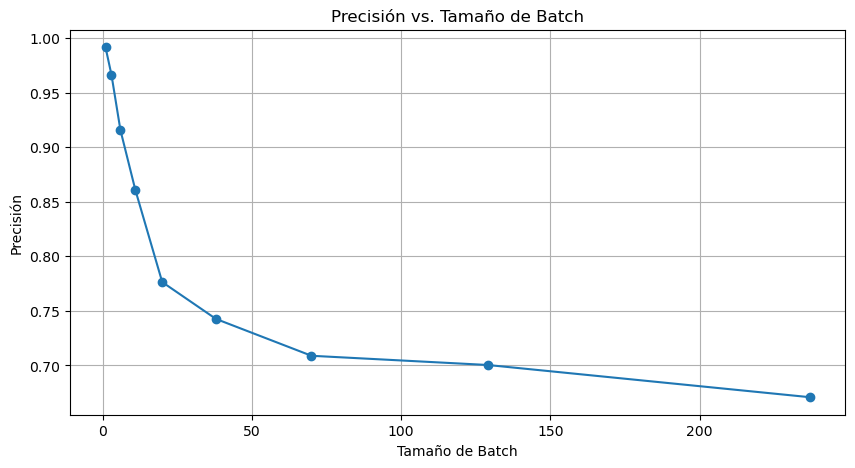

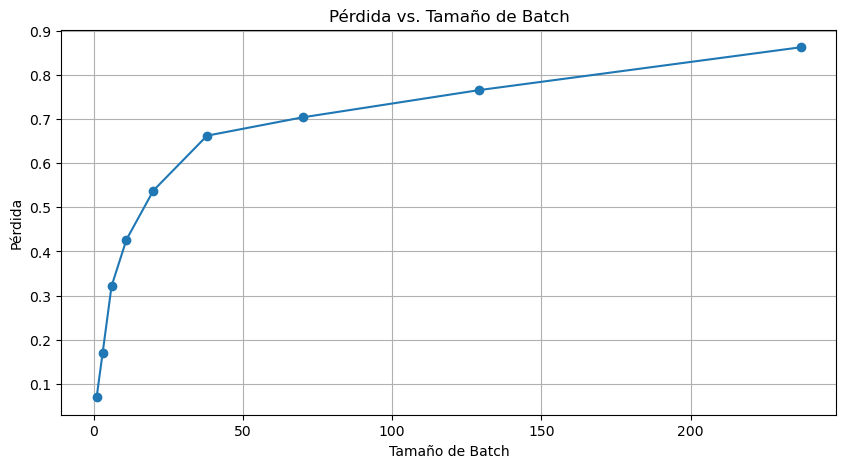

In [70]:
batch_sizes = list(historiales_por_batch.keys())
precisions_batch = [hist.history['accuracy'][-1] for hist in historiales_por_batch.values()]
losses_batch = [hist.history['loss'][-1] for hist in historiales_por_batch.values()]
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, precisions_batch, marker='o', linestyle='-')
plt.title('Precisión vs. Tamaño de Batch')
plt.xlabel('Tamaño de Batch')
plt.ylabel('Precisión')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(batch_sizes, losses_batch, marker='o', linestyle='-')
plt.title('Pérdida vs. Tamaño de Batch')
plt.xlabel('Tamaño de Batch')
plt.ylabel('Pérdida')
plt.grid(True)
plt.show()



In [71]:
import pandas as pd

batch_sizes = list(historiales_por_batch.keys())
precisions_batch = [hist.history['accuracy'][-1] for hist in historiales_por_batch.values()]
losses_batch = [hist.history['loss'][-1] for hist in historiales_por_batch.values()]

df_batch = pd.DataFrame({
    'Tamaño de Batch': batch_sizes,
    'Precisión': precisions_batch,
    'Pérdida': losses_batch
})

print(df_batch)


   Tamaño de Batch  Precisión   Pérdida
0                1   0.991561  0.070265
1                3   0.966245  0.169936
2                6   0.915612  0.321660
3               11   0.860759  0.427026
4               20   0.776371  0.537828
5               38   0.742616  0.662119
6               70   0.708861  0.703553
7              129   0.700422  0.765060
8              237   0.670886  0.862219


In [30]:
### Tu conclusión aquí
### Con un tamaño de batch pequeño, observamos que el modelo converge más rápidamente, 
### pero es menos estable. Con un tamaño de batch grande, 
### la convergencia es más suave, pero lleva más tiempo. 
### Para este caso especifico se tiene un tamaño de batch intermedio 
### resulta en un buen equilibrio entre velocidad y estabilidad.